<a href="https://colab.research.google.com/github/tantiboro/portfolio_builder/blob/main/df_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Nov 10 04:32:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/New Folder/loans.csv')
len(df)

2086700

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [5]:
df_clean = df[[ 'loan_amount', 'sector_name', 'currency_policy', 'loan_use', 'distribution_model', 'repayment_interval', 'posted_time', 'status']]

In [6]:
df_clean = df_clean[df_clean.status != 'fundRaising']

In [7]:
df_clean.isna().sum()

loan_amount               0
sector_name               0
currency_policy           0
loan_use              45914
distribution_model        0
repayment_interval        0
posted_time               0
status                    0
dtype: int64

In [8]:
df_clean_red = df_clean.dropna()

In [9]:
df_clean_red.to_csv('df_clean.csv', index=False)

In [10]:
df_clean_red['repayment_interval'].value_counts()

monthly      1757101
bullet        185227
irregular      90894
Name: repayment_interval, dtype: int64

In [11]:
df_clean_red['status'].value_counts()

funded     1940834
expired      92388
Name: status, dtype: int64

In [12]:
# How many columns and rows are they in the dataset
print(f'The dataset has {df_clean_red.shape[0]} rows and {df_clean_red.shape[1]} columns.')

The dataset has 2033222 rows and 8 columns.


Exploratory data analysis

<function matplotlib.pyplot.show(close=None, block=None)>

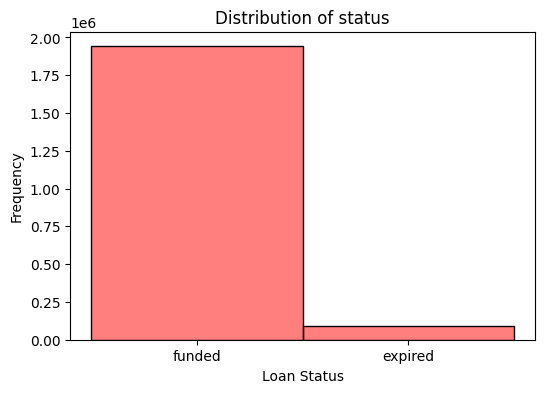

In [13]:
plt.figure(figsize=(6,4))

sns.histplot(df_clean_red.status, color='red', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Loan Status')
plt.title('Distribution of status')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

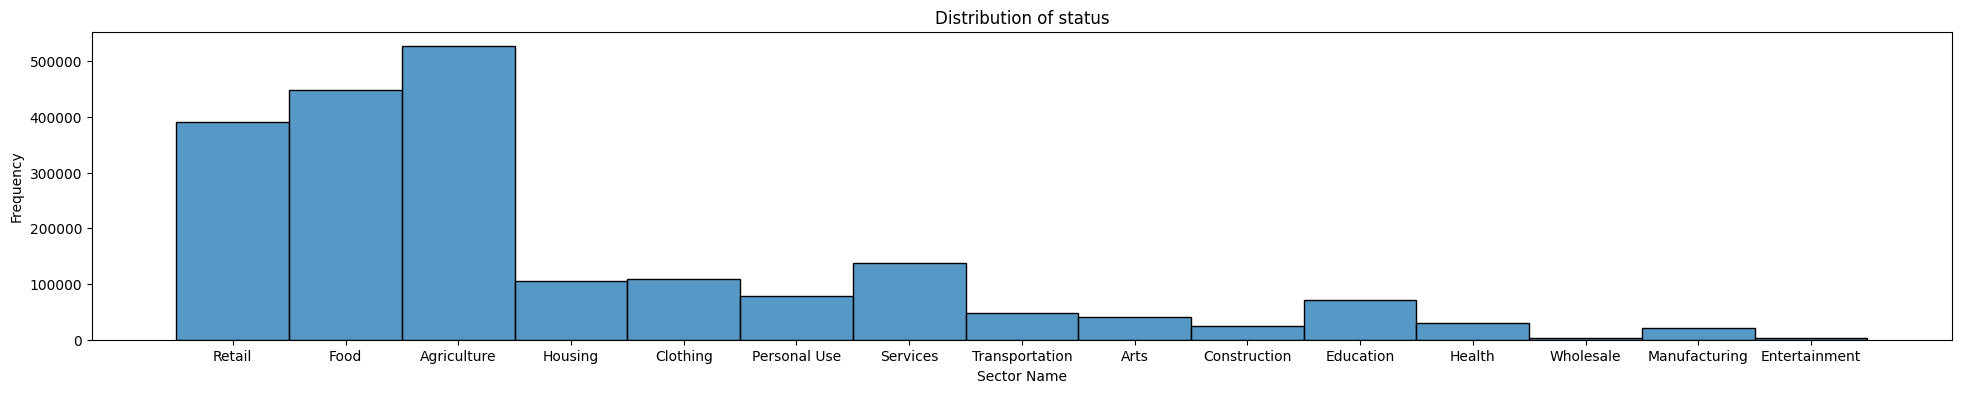

In [14]:
plt.figure(figsize=(24,4))

sns.histplot(df_clean_red.sector_name)
plt.ylabel('Frequency')
plt.xlabel('Sector Name')
#plt.xticks(rotation='vertical')
plt.title('Distribution of status')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

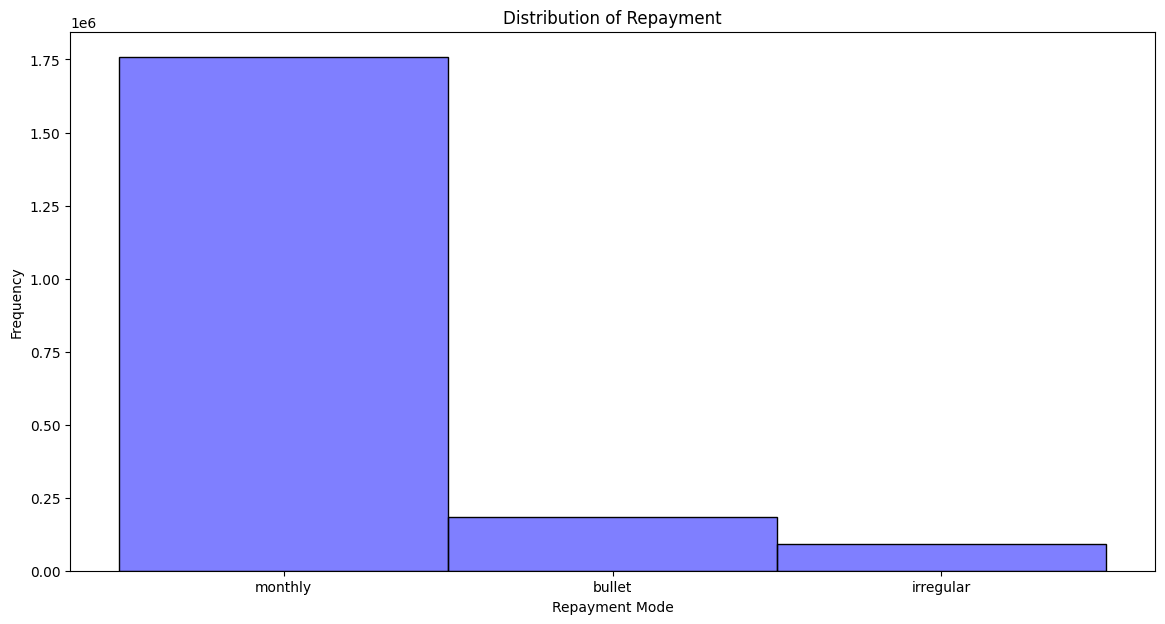

In [15]:
plt.figure(figsize=(14,7))

sns.histplot(df_clean_red.repayment_interval, color='blue', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Repayment Mode')
#plt.xticks(rotation='vertical')
plt.title('Distribution of Repayment')

plt.show

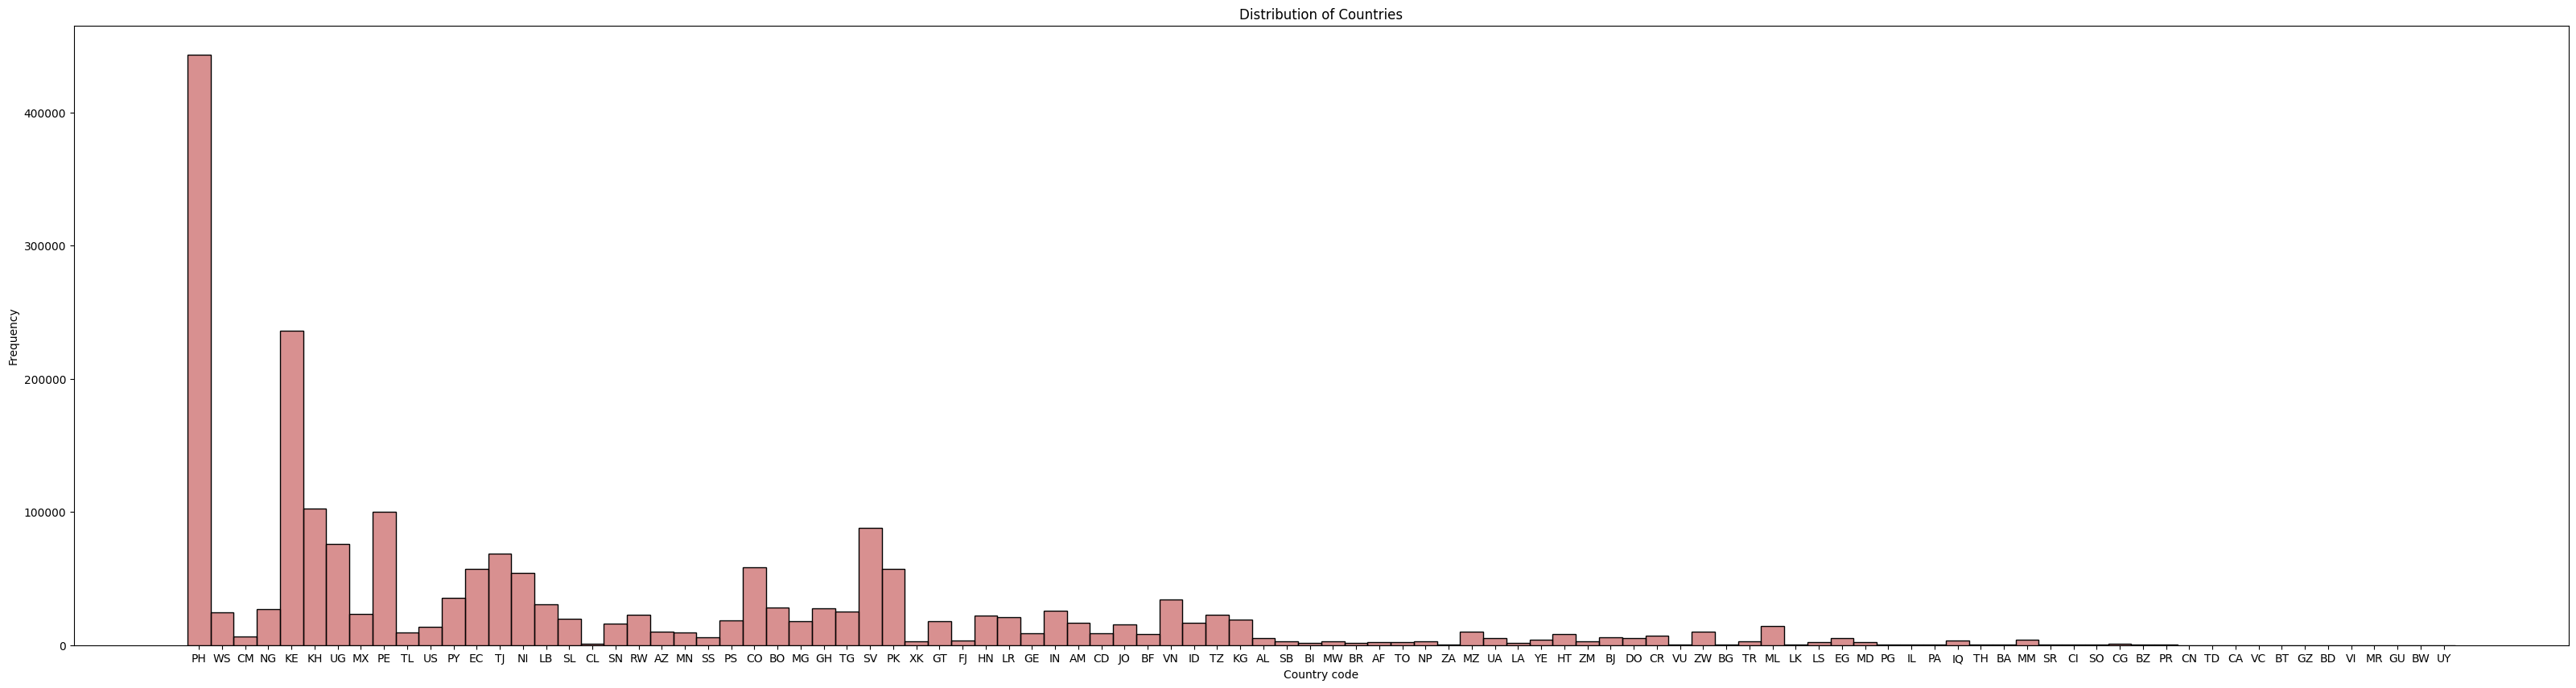

In [16]:
plt.figure(figsize=(40,10))

sns.histplot(df.country_code, color='firebrick', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Country code')
#plt.xticks(rotation='vertical')
plt.title('Distribution of Countries')

plt.show()

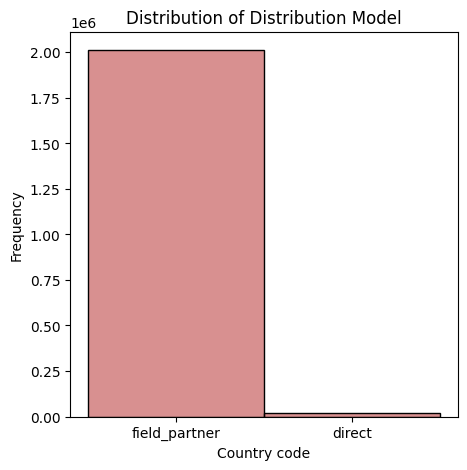

In [17]:
plt.figure(figsize=(5,5))

sns.histplot(df_clean_red.distribution_model, color='firebrick', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Country code')
#plt.xticks(rotation='vertical')
plt.title('Distribution of Distribution Model')

plt.show()

In [18]:
print(f'The columns of the dataset are: {df_clean_red.columns.to_list()}')

The columns of the dataset are: ['loan_amount', 'sector_name', 'currency_policy', 'loan_use', 'distribution_model', 'repayment_interval', 'posted_time', 'status']


In [19]:
data = df_clean_red.drop(columns=['repayment_interval', 'posted_time', 'loan_use'])
data.head()

,loan_amount,sector_name,currency_policy,distribution_model,status
0,1100.0,Retail,shared,field_partner,funded
1,125.0,Retail,shared,field_partner,funded
2,175.0,Food,shared,field_partner,funded
3,1400.0,Agriculture,shared,field_partner,funded
4,425.0,Food,shared,field_partner,funded


In [20]:
data.isna().sum()

loan_amount           0
sector_name           0
currency_policy       0
distribution_model    0
status                0
dtype: int64

In [21]:
len(data)

2033222

In [22]:
data.to_csv('data_one.csv', index=False)

In [23]:
sector_counts = data['sector_name'].value_counts()
import plotly.express as px
fig = px.bar(y=sector_counts.values, x=sector_counts.index, color=sector_counts.index, height=400,width=600)
fig.show()
plt.savefig('sector_name.png')

<Figure size 640x480 with 0 Axes>

In [24]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 2033222 rows and 5 columns.


In [25]:
data.status.value_counts()

funded     1940834
expired      92388
Name: status, dtype: int64

In [26]:
data_red = data.copy()

In [27]:
len(data_red)

2033222

In [28]:
data_red['status'] = data_red.apply(lambda x: 0if x.status == 'funded' else 1, axis=1)

In [29]:
#Print the percentage of loans that were not approved
(len(data_red.loc[data_red['status'] == 1])) / (len(data_red.loc[data_red['status'] == 0])) * 100

4.760221636677841

From above we can see that the dataset is imbalanced- Only 4.76% of loans have not been approved. Let prepare the data for machine learning

In [30]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data_red, test_size=0.33, random_state=11)
#df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [31]:
y_train = df_train.status.values
y_test = df_test.status.values
#y_val = df_val.status.values
#del df_train['status']
#del df_test['status']
#del df_val['status']

In [32]:
df_train.status.value_counts()

0    1300518
1      61740
Name: status, dtype: int64

In [33]:
# del df_train['status']
# del df_test['status']

In [34]:
categorical = ['sector_name', 'currency_policy', 'distribution_model']
numerical = ['loan_amount']

In [35]:
df_train[categorical].nunique()

sector_name           15
currency_policy        2
distribution_model     2
dtype: int64

In [36]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report, precision_score, roc_auc_score
from sklearn.feature_extraction import DictVectorizer

In [37]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
test_dict = df_test[categorical + numerical].to_dict(orient='records')
#val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [38]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [39]:
X_train = dv.fit_transform(train_dict)
X_test = dv.fit_transform(test_dict)
#X_val = dv.transform(val_dict)

# Baseline Models

In [40]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [41]:
#DummyClassifier to predit only status 0
dummy = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

#Checking unique labels
print('Unique predicted labesl: ', (np.unique(dummy_pred)))


#Checking for accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))
print('Test score: ', f1_score(y_test, dummy_pred))
print('Test score: ', recall_score(y_test, dummy_pred))

Unique predicted labesl:  [0]
Test score:  0.9543224375674403
Test score:  0.0
Test score:  0.0


In [42]:
from sklearn.metrics import balanced_accuracy_score
acc_dummy=accuracy_score(y_test,dummy_pred)
#bal_acc=balanced_accuracy_score(y_test,dummy_pred)
recall_dummy=recall_score(y_test,dummy_pred)
precision_dummy=precision_score(y_test,dummy_pred)
f1_dummy=f1_score(y_test,dummy_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [43]:
print(acc_dummy)
#print(bal_acc)
print(recall_dummy)
print(f1_dummy)

0.9543224375674403
0.0
0.0


In [44]:
index = []
scores = {"Accuracy": [], "Recall": [], "F1 Score": []}

index += ["Dummy classifier"]

#cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(acc_dummy.mean())
#scores["Balanced accuracy"].append(bal_acc.mean())
scores["Recall"].append(recall_dummy.mean())
scores["F1 Score"].append(f1_dummy.mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Recall,F1 Score
Dummy classifier,0.954322,0.0,0.0


As you can see, our accuracy for predicting that all loans will be funded is 95.47%!
As the Dummy Classifier predicts only status 0, it is clearly not a good option for our objective of correctly helping borrowers who will get rejected.
Let see how logistic regression performs on the dataset

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
lr = model.fit(X_train, y_train)

In [46]:
lr_pred = lr.predict(X_test)

In [47]:
print('Test score: ', accuracy_score(y_test, lr_pred))
print('Test score: ', f1_score(y_test, lr_pred))
print('Test score: ', recall_score(y_test, lr_pred))

Test score:  0.9539885895517495
Test score:  0.003228722717293039
Test score:  0.001631427825632994


In [48]:
from sklearn.metrics import balanced_accuracy_score
acc_lr=accuracy_score(y_test,lr_pred)
#bal_acc1=balanced_accuracy_score(y_test,lr_pred)
recall_lr=recall_score(y_test,lr_pred)
precision_lr=precision_score(y_test,lr_pred)
f1_lr=f1_score(y_test,lr_pred)

In [49]:

#scores = {"Accuracy": [], "Balanced accuracy": [], "Recall": [], "F1 Score": []}

index += ["Linear Regression Classifier"]

#cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(acc_lr.mean())
#scores["Balanced accuracy"].append(bal_acc1.mean())
scores["Recall"].append(recall_lr.mean())
scores["F1 Score"].append(f1_lr.mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Recall,F1 Score
Dummy classifier,0.954322,0.000000,0.000000
Linear Regression Classifier,0.953989,0.001631,0.003229


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_leaf=5 ,random_state=42)
rfc = model.fit(X_train, y_train)

In [51]:
rfc_pred = rfc.predict(X_test)

In [52]:
print('Test score: ', accuracy_score(y_test, rfc_pred))
print('Test score: ', f1_score(y_test, rfc_pred))
print('Test score: ', recall_score(y_test, rfc_pred))

Test score:  0.9544386882157612
Test score:  0.008819142727449584
Test score:  0.004437483685721744


In [53]:
acc_rfc=accuracy_score(y_test,rfc_pred)
#bal_acc=balanced_accuracy_score(y_test,rfc_pred)
recall_rfc=recall_score(y_test,rfc_pred)
precision_rfc=precision_score(y_test,rfc_pred)
f1_rfc=f1_score(y_test,rfc_pred)

In [54]:
#scores = {"Accuracy": [], "Balanced accuracy": [], "Recall": [], "F1 Score": []}
index += ["Random Forest Classifier"]

#cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(acc_rfc.mean())
#scores["Balanced accuracy"].append(bal_acc.mean())
scores["Recall"].append(recall_rfc.mean())
scores["F1 Score"].append(f1_rfc.mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Recall,F1 Score
Dummy classifier,0.954322,0.000000,0.000000
Linear Regression Classifier,0.953989,0.001631,0.003229
Random Forest Classifier,0.954439,0.004437,0.008819


In [55]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
xgb_pred = xgb_cl.predict(X_test)
# dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
# dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [56]:
print('Test score: ', accuracy_score(y_test, xgb_pred))
print('Test score: ', f1_score(y_test, xgb_pred))
print('Test score: ', recall_score(y_test, xgb_pred))

Test score:  0.9544983039328488
Test score:  0.014589116261054805
Test score:  0.0073740537718611325


In [57]:
acc_xgb=accuracy_score(y_test,xgb_pred)
#bal_acc=balanced_accuracy_score(y_test,xgb_pred)
recall_xgb=recall_score(y_test,xgb_pred)
precision=precision_score(y_test,xgb_pred)
f1_xgb=f1_score(y_test,xgb_pred)

In [58]:
#scores = {"Accuracy": [], "Balanced accuracy": [], "Recall": [], "F1 Score": []}
index += ["Extreme gradient boosting"]

#cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(acc_xgb.mean())
#scores["Balanced accuracy"].append(bal_acc.mean())
scores["Recall"].append(recall_xgb.mean())
scores["F1 Score"].append(f1_xgb.mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Recall,F1 Score
Dummy classifier,0.954322,0.000000,0.000000
Linear Regression Classifier,0.953989,0.001631,0.003229
Random Forest Classifier,0.954439,0.004437,0.008819
Extreme gradient boosting,0.954498,0.007374,0.014589


In [59]:
# Separate minority and majority groups
not_funded = data_red[data_red.status == 1]
funded = data_red[data_red.status == 0]

In [60]:
print(len(not_funded))
print(len(funded))

92388
1940834


In [61]:
# Upsampling minority group
from sklearn.utils import resample
not_funded_upsampled = resample(not_funded,
                                replace=True, # sample with replacement
                                n_samples=len(funded), # match number in majority group
                                random_state=27) # reproducible results

# Combine majority and upsamples minority
df_up = pd.concat([funded, not_funded_upsampled])

# check new groups counts
df_up.status.value_counts()

0    1940834
1    1940834
Name: status, dtype: int64

In [62]:
df_train_up, df_test_up = train_test_split(df_up, test_size=0.33, random_state=11)
#df_train_up, df_val_up = train_test_split(df_train_up_full, test_size=0.33, random_state=11)

In [63]:
y_train_up = df_train_up.status.values
y_test_up = df_test_up.status.values
#y_val_up = df_val_up.status.values
# del df_train_up['status']
# del df_test_up['status']
# del df_val_up['status']

In [64]:
train_up_dict = df_train_up[categorical + numerical].to_dict(orient='records')
test_up_dict = df_test_up[categorical + numerical].to_dict(orient='records')
#val_up_dict = df_val_up[categorical + numerical].to_dict(orient='records')

In [65]:
dv = DictVectorizer(sparse=False)
X_train_up = dv.fit_transform(train_up_dict)
X_test_up = dv.fit_transform(test_up_dict)
#X_val_up = dv.fit_transform(val_up_dict)

In [66]:
#DummyClassifier to predit only status 0
dummy = DummyClassifier(strategy="uniform").fit(X_train_up, y_train_up)
dummy_pred_up = dummy.predict(X_test_up)

#Checking unique labels
print('Unique predicted labesl: ', (np.unique(dummy_pred_up)))


#Checking for accuracy
print('Test score: ', accuracy_score(y_test_up, dummy_pred_up))
print('Test score: ', f1_score(y_test_up, dummy_pred_up))
print('Test score: ', recall_score(y_test_up, dummy_pred_up))

Unique predicted labesl:  [0 1]
Test score:  0.5001081227931435
Test score:  0.4999090157219271
Test score:  0.49944601709700476


In [67]:
lr = model.fit(X_train_up, y_train_up)
rfc = model.fit(X_train_up, y_train_up)
xgb_cl.fit(X_train_up, y_train_up)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
lr_pred_up = lr.predict(X_test_up)
rfc_pred_up = rfc.predict(X_test_up)
xgb_pred_up = xgb_cl.predict(X_test_up)

In [69]:
print('Test Accuracy Score: ', accuracy_score(y_test_up, lr_pred_up))
print('Test F1 Score: ', f1_score(y_test_up, lr_pred_up))
print('Test Recall Score: ', recall_score(y_test_up, lr_pred_up))

Test Accuracy Score:  0.7570867269708209
Test F1 Score:  0.7831852179087504
Test Recall Score:  0.8769955088371977


In [70]:
acc_lrup=accuracy_score(y_test_up,lr_pred_up)
#bal_acc=balanced_accuracy_score(y_test_up,lr_pred_up)
recall_lrup=recall_score(y_test_up,lr_pred_up)
#precision_lrup=precision_score(y_test_up,lr_pred_up)
f1_lrup=f1_score(y_test_up,lr_pred_up)

In [71]:
#scores = {"Accuracy": [], "Balanced accuracy": [], "Recall": [], "F1 Score": []}
index += ["Linear Regression Up"]

#cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(acc_lrup.mean())
#scores["Balanced accuracy"].append(bal_acc.mean())
scores["Recall"].append(recall_lrup.mean())
scores["F1 Score"].append(f1_lrup.mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Recall,F1 Score
Dummy classifier,0.954322,0.000000,0.000000
Linear Regression Classifier,0.953989,0.001631,0.003229
Random Forest Classifier,0.954439,0.004437,0.008819
Extreme gradient boosting,0.954498,0.007374,0.014589
Linear Regression Up,0.757087,0.876996,0.783185


In [72]:
print('Test Accuracy Score: ', accuracy_score(y_test_up, rfc_pred_up))
print('Test F1 Score: ', f1_score(y_test_up, rfc_pred_up))
print('Test Recall Score: ', recall_score(y_test_up, rfc_pred_up))

Test Accuracy Score:  0.7570867269708209
Test F1 Score:  0.7831852179087504
Test Recall Score:  0.8769955088371977


In [73]:
acc_rfcup=accuracy_score(y_test_up,rfc_pred_up)
#bal_acc=balanced_accuracy_score(y_test_up,lr_pred_up)
recall_rfcup=recall_score(y_test_up,rfc_pred_up)
precision_rfcup=precision_score(y_test_up,rfc_pred_up)
f1_rfcup=f1_score(y_test_up,rfc_pred_up)

In [74]:
#scores = {"Accuracy": [], "Balanced accuracy": [], "Recall": [], "F1 Score": []}
index += ["RandomForestClassifier Up"]

#cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(acc_rfcup.mean())
#scores["Balanced accuracy"].append(bal_acc.mean())
scores["Recall"].append(recall_rfcup.mean())
scores["F1 Score"].append(f1_rfcup.mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Recall,F1 Score
Dummy classifier,0.954322,0.000000,0.000000
Linear Regression Classifier,0.953989,0.001631,0.003229
Random Forest Classifier,0.954439,0.004437,0.008819
Extreme gradient boosting,0.954498,0.007374,0.014589
Linear Regression Up,0.757087,0.876996,0.783185
RandomForestClassifier Up,0.757087,0.876996,0.783185


In [75]:
print('Test Accuracy Score: ', accuracy_score(y_test_up, xgb_pred_up))
print('Test F1 Score: ', f1_score(y_test_up, xgb_pred_up))
print('Test Recall Score: ', recall_score(y_test_up, xgb_pred_up))

Test Accuracy Score:  0.7635124216304917
Test F1 Score:  0.7847107376344895
Test Recall Score:  0.8615214399186035


In [76]:
acc_xgbup=accuracy_score(y_test_up,xgb_pred_up)
#bal_acc=balanced_accuracy_score(y_test_up,xgb_pred_up)
recall_xgbup=recall_score(y_test_up,xgb_pred_up)
#precision=precision_score(y_test_up,xgb_pred_up)
f1_xgbup=f1_score(y_test_up,xgb_pred_up)

In [77]:
#scores = {"Accuracy": [], "Balanced accuracy": [], "Recall": [], "F1 Score": []}
index += ["Extreme gradient boosting up"]

#cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(acc_xgbup.mean())
#scores["Balanced accuracy"].append(bal_acc.mean())
scores["Recall"].append(recall_xgbup.mean())
scores["F1 Score"].append(f1_xgbup.mean())
scores
# df_scores = pd.DataFrame(scores, index=index)
# df_scores

{'Accuracy': [0.9543224375674403,
  0.9539885895517495,
  0.9544386882157612,
  0.9544983039328488,
  0.7570867269708209,
  0.7570867269708209,
  0.7635124216304917],
 'Recall': [0.0,
  0.001631427825632994,
  0.004437483685721744,
  0.0073740537718611325,
  0.8769955088371977,
  0.8769955088371977,
  0.8615214399186035],
 'F1 Score': [0.0,
  0.003228722717293039,
  0.008819142727449584,
  0.014589116261054805,
  0.7831852179087504,
  0.7831852179087504,
  0.7847107376344895]}

Now Let downsample the data and check the Performance
All the models performed almost identical when it is upsampledand much better with a recall of 88%

In [78]:
df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Recall,F1 Score
Dummy classifier,0.954322,0.000000,0.000000
Linear Regression Classifier,0.953989,0.001631,0.003229
Random Forest Classifier,0.954439,0.004437,0.008819
Extreme gradient boosting,0.954498,0.007374,0.014589
Linear Regression Up,0.757087,0.876996,0.783185
RandomForestClassifier Up,0.757087,0.876996,0.783185
Extreme gradient boosting up,0.763512,0.861521,0.784711


In [79]:
# downsampling majority group
from sklearn.utils import resample
funded_downsampled = resample(funded,
                                replace=True, # sample with replacement
                                n_samples=len(not_funded), # match number in majority group
                                random_state=27) # reproducible results

# Combine majority and upsamples minority
df_down = pd.concat([not_funded, funded_downsampled])

# check new groups counts
df_down.status.value_counts()

1    92388
0    92388
Name: status, dtype: int64

In [80]:
df_train_down, df_test_down = train_test_split(df_down, test_size=0.33, random_state=11)
#df_train_down, df_val_down = train_test_split(df_train_down_full, test_size=0.33, random_state=11)

In [81]:
y_train_down = df_train_down.status.values
y_test_down = df_test_down.status.values
# y_val_down = df_val_down.status.values
# del df_train_down['status']
# del df_test_down['status']
# del df_val_down['status']

In [82]:
train_down_dict = df_train_down[categorical + numerical].to_dict(orient='records')
test_down_dict = df_test_down[categorical + numerical].to_dict(orient='records')
#val_down_dict = df_val_down[categorical + numerical].to_dict(orient='records')

In [83]:
dv = DictVectorizer(sparse=False)
X_train_down = dv.fit_transform(train_down_dict)
X_test_down = dv.fit_transform(test_down_dict)
#X_val_down = dv.fit_transform(val_down_dict)

In [84]:
lr = model.fit(X_train_down, y_train_down)
rfc = model.fit(X_train_down, y_train_down)
xgb_cl.fit(X_train_down, y_train_down)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
lr_pred_down = lr.predict(X_test_down)
rfc_pred_down = rfc.predict(X_test_down)
xgb_pred_down = xgb_cl.predict(X_test_down)

In [86]:
print('Test Accuracy Score: ', accuracy_score(y_test_down, lr_pred_down))
print('Test F1 Score: ', f1_score(y_test_down, lr_pred_down))
print('Test Recall Score: ', recall_score(y_test_down, lr_pred_down))

Test Accuracy Score:  0.7561539596897191
Test F1 Score:  0.7818803268347784
Test Recall Score:  0.8763852806734849


In [87]:
acc_lrdown=accuracy_score(y_test_down,lr_pred_down)
#bal_acc=balanced_accuracy_score(y_test_up,lr_pred_up)
recall_lrdown=recall_score(y_test_down,lr_pred_down)
#precision_lrup=precision_score(y_test_up,lr_pred_up)
f1_lrdown=f1_score(y_test_down,lr_pred_down)

In [88]:
#scores = {"Accuracy": [], "Balanced accuracy": [], "Recall": [], "F1 Score": []}
index += ["Linear Regression Down"]

#cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(acc_lrdown.mean())
#scores["Balanced accuracy"].append(bal_acc.mean())
scores["Recall"].append(recall_lrdown.mean())
scores["F1 Score"].append(f1_lrdown.mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Recall,F1 Score
Dummy classifier,0.954322,0.000000,0.000000
Linear Regression Classifier,0.953989,0.001631,0.003229
Random Forest Classifier,0.954439,0.004437,0.008819
Extreme gradient boosting,0.954498,0.007374,0.014589
Linear Regression Up,0.757087,0.876996,0.783185
RandomForestClassifier Up,0.757087,0.876996,0.783185
Extreme gradient boosting up,0.763512,0.861521,0.784711
Linear Regression Down,0.756154,0.876385,0.781880


In [89]:
print('Test Accuracy Score: ', accuracy_score(y_test_down, rfc_pred_down))
print('Test F1 Score: ', f1_score(y_test_down, rfc_pred_down))
print('Test Recall Score: ', recall_score(y_test_down, rfc_pred_down))

Test Accuracy Score:  0.7561539596897191
Test F1 Score:  0.7818803268347784
Test Recall Score:  0.8763852806734849


In [90]:
acc_rfcdown=accuracy_score(y_test_down,rfc_pred_down)
#bal_acc=balanced_accuracy_score(y_test_up,lr_pred_up)
recall_rfcdown=recall_score(y_test_down,rfc_pred_down)
#precision_lrup=precision_score(y_test_up,lr_pred_up)
f1_rfcdown=f1_score(y_test_down,rfc_pred_down)

In [91]:
#scores = {"Accuracy": [], "Balanced accuracy": [], "Recall": [], "F1 Score": []}
index += ["RandomForestClassifier Down"]

#cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(acc_rfcdown.mean())
#scores["Balanced accuracy"].append(bal_acc.mean())
scores["Recall"].append(recall_rfcdown.mean())
scores["F1 Score"].append(f1_rfcdown.mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Recall,F1 Score
Dummy classifier,0.954322,0.000000,0.000000
Linear Regression Classifier,0.953989,0.001631,0.003229
Random Forest Classifier,0.954439,0.004437,0.008819
Extreme gradient boosting,0.954498,0.007374,0.014589
Linear Regression Up,0.757087,0.876996,0.783185
RandomForestClassifier Up,0.757087,0.876996,0.783185
Extreme gradient boosting up,0.763512,0.861521,0.784711
Linear Regression Down,0.756154,0.876385,0.781880
RandomForestClassifier Down,0.756154,0.876385,0.781880


In [92]:
print('Test Accuracy Score: ', accuracy_score(y_test_down, xgb_pred_down))
print('Test F1 Score: ', f1_score(y_test_down, xgb_pred_down))
print('Test Recall Score: ', recall_score(y_test_down, xgb_pred_down))

Test Accuracy Score:  0.7593846860291585
Test F1 Score:  0.781419462487337
Test Recall Score:  0.8624420401854714


In [93]:
acc_xgbdown=accuracy_score(y_test_down, xgb_pred_down)
#bal_acc=balanced_accuracy_score(y_test_up,lr_pred_up)
recall_xgbdown=recall_score(y_test_down, xgb_pred_down)
#precision_lrup=precision_score(y_test_up,lr_pred_up)
f1_xgbdown=f1_score(y_test_down, xgb_pred_down)

In [94]:
#scores = {"Accuracy": [], "Balanced accuracy": [], "Recall": [], "F1 Score": []}
index += ["Extreme gradient boosting Down"]

#cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(acc_xgbdown.mean())
#scores["Balanced accuracy"].append(bal_acc.mean())
scores["Recall"].append(recall_xgbdown.mean())
scores["F1 Score"].append(f1_xgbdown.mean())
#scores
df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Recall,F1 Score
Dummy classifier,0.954322,0.000000,0.000000
Linear Regression Classifier,0.953989,0.001631,0.003229
Random Forest Classifier,0.954439,0.004437,0.008819
Extreme gradient boosting,0.954498,0.007374,0.014589
Linear Regression Up,0.757087,0.876996,0.783185
RandomForestClassifier Up,0.757087,0.876996,0.783185
Extreme gradient boosting up,0.763512,0.861521,0.784711
Linear Regression Down,0.756154,0.876385,0.781880
RandomForestClassifier Down,0.756154,0.876385,0.781880
Extreme gradient boosting Down,0.759385,0.862442,0.781419


In [95]:
df_scores.to_csv('df_scores.csv', index=True)